## Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Данные

Датасет представлен ввиде файла с расширением csv (real_estate_data.csv).
Путь к файлу: /datasets/real_estate_data.csv

Датасет включает в себя следующие колонки:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

### Задачи исследования

[1. Изучить информацию](#Explore)
* открыть файл
* просмотреть начало и конец датасета
* сделать первые выводы

[2. Предобработка данных](#Processing)
* обработка пропусков
* изменить типы данных
* обработать дубликаты
* выделить леммы
* провести категоризацию данных
        
[3. Посчитать и добавить в таблицу](#Add)
* цену квадратного метра
* день недели, месяц и год публикации объявления
* этаж квартиры; варианты — первый, последний, другой
* соотношение жилой и общей площади, а также отношение площади кухни к общей

[4. Провести исследовательский анализ данных](#Research)
* Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
* Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько по времени обычно занимает продажа.
* Уберать редкие и выбивающиеся значения.
* Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделить среди них населённые пункты с самой высокой и низкой стоимостью жилья.
* Изучить предложения квартир. Выделить квартиры в Санкт-Петербурге ('locality_name'). Создать столбец с расстоянием до центра в километрах. Посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу.
* Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).Отличаются ли они от общих выводов по всему городу?

[5. Ответы на поставленные задачи](#Answers)
* Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Какие факторы больше всего влияют на стоимость квартиры?
* Зависит ли цена от площади, числа комнат, удалённости от центра? 
* Есть ли зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
* Есть ли зависимость от даты размещения: дня недели, месяца и года.
* Выяснить, какая область входит в центр.

[6. Результаты](#Results)
* Вывод
* Рекомендации

### <a name="Explore"></a> Шаг 1. Откройте файл с данными и изучите общую информацию.

In [1]:
# импорт библиотеки pandas, pymystem3, collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pymystem3 import Mystem
from collections import Counter

# форматируем вывод чисел
pd.options.display.float_format = '{:.2f}'.format

# чтение файла
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# общая информация о данных
data.info()

# 10 случайных строк таблицы
display(data.sample(10))

# основные статистические данные
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11878,7,13200000.00,96.70,2014-12-22T00:00:00,3,nan,25.00,53.00,10,NaN,...,16.00,0.00,Санкт-Петербург,36614.00,12135.00,0.00,nan,1.00,699.00,626.00
15695,6,2800000.00,30.40,2017-09-20T00:00:00,1,2.50,5.00,16.42,1,NaN,...,5.70,nan,Пушкин,17866.00,30020.00,1.00,745.00,1.00,664.00,217.00
7120,1,3980000.00,36.90,2019-03-12T00:00:00,1,nan,14.00,21.10,9,NaN,...,7.60,nan,Санкт-Петербург,13472.00,13385.00,0.00,nan,0.00,nan,14.00
6454,7,2900000.00,42.10,2018-10-22T00:00:00,2,2.50,5.00,27.70,1,NaN,...,5.00,nan,посёлок городского типа Кузьмоловский,nan,nan,nan,nan,nan,nan,63.00
2923,12,4780000.00,72.00,2018-09-25T00:00:00,3,2.50,9.00,43.00,8,NaN,...,8.50,nan,Гатчина,nan,nan,nan,nan,nan,nan,nan
12385,5,3100000.00,34.40,2017-12-15T00:00:00,1,nan,25.00,nan,12,NaN,...,nan,nan,Санкт-Петербург,39617.00,16453.00,0.00,nan,1.00,466.00,39.00
8534,8,5650000.00,54.00,2017-11-20T00:00:00,2,2.50,9.00,32.80,9,NaN,...,8.50,1.00,Санкт-Петербург,15491.00,15399.00,1.00,252.00,1.00,491.00,117.00
2996,17,2590000.00,31.50,2017-05-30T00:00:00,1,2.53,5.00,17.80,5,NaN,...,5.20,0.00,посёлок Стрельна,28320.00,23491.00,1.00,687.00,0.00,nan,64.00
12388,12,6850000.00,62.10,2018-04-20T00:00:00,2,2.75,20.00,31.00,6,NaN,...,13.90,2.00,Санкт-Петербург,34506.00,14375.00,0.00,nan,0.00,nan,17.00
4658,20,3750000.00,46.00,2016-12-08T00:00:00,2,nan,5.00,19.80,5,NaN,...,9.60,nan,Всеволожск,nan,nan,nan,nan,nan,nan,411.00


,count,mean,std,min,25%,50%,75%,max
total_images,23699.00,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,23699.00,6541548.77,10887013.27,12190.00,3400000.00,4650000.00,6800000.00,763000000.00
total_area,23699.00,60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,23699.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,14504.00,2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,23613.00,10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,21796.00,34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,23699.00,5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,21421.00,10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,12180.00,1.15,1.07,0.00,0.00,1.00,2.00,5.00


### Вывод

1. Много пропусков в следующих колонках: ceiling_height, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, ponds_nearest, days_exposition
2. Необходимо изменить типы данных в колонках: floors_total (int), is_apartment (bool), balcony (int), parks_around3000 (int), days_exposition.
3. Привести дату к четаемому виду (колонка first_day_exposition)
4. Необходимо изменить часть названий колонок, привести к одному регистру и изменить расположение колонок
5. По данным статистической сводки видно, что есть анамальные значения практически в каждой колонке.

### <a name="Processing"></a> Шаг 2. Предобработка данных

In [2]:
# в функции считаем количество пропусков, процент пропусков
def search_null(data):
    columns = list(data)
    volume_null = []
    percent_null = []
    column_null = []
    for column in columns:
        if data[column].isnull().sum() != 0:
            column_null.append(column)
            volume_null.append(data[column].isnull().sum())
            percent_null.append(data[column].isnull().sum()/data.shape[0] * 100)
    data_null = pd.DataFrame({'column': column_null, 'volume_null': volume_null, 'percent_null': percent_null})
    return data_null.sort_values(by='percent_null')

# выводим результат функции
print(search_null(data))

                 column  volume_null  percent_null
6         locality_name           49          0.21
1          floors_total           86          0.36
2           living_area         1903          8.03
4          kitchen_area         2278          9.61
13      days_exposition         3181         13.42
9      parks_around3000         5518         23.28
11     ponds_around3000         5518         23.28
8   cityCenters_nearest         5519         23.29
7      airports_nearest         5542         23.38
0        ceiling_height         9195         38.80
5               balcony        11519         48.61
12        ponds_nearest        14589         61.56
10        parks_nearest        15620         65.91
3          is_apartment        20924         88.29


In [3]:
# Заполняем пропуски

# колонку ceiling_height заполняем медианным значением так, как есть значения выходящие за рамки обычных 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

# колонку floors_total заполняем медианным значением так, как есть значения выходящие за рамки обычных
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

# колонку living_area заполняем медианным значением так, как есть значения выходящие за рамки обычных
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

# колонку is_apartment заполняем 0 так, как информация отсутствует, считаем, что объект не является апартаментами
# перевод в bool ьак же решил бы проблемы с пропусками, установив вместо NaN - False
data['is_apartment'] = data['is_apartment'].fillna(0)

# колонку kitchen_area заполняем медианным значением так, как есть значения выходящие за рамки обычных
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

# колонку balcony заполняем 0 так, как информация отсутствует, считаем, что объект не имеет балкона
data['balcony'] = data['balcony'].fillna(0)

# колонку locality_name заполняем словом 'Неизвестный' так, как информация отсутствует
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

# колонку airports_nearest заполняем средним значением
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].mean())

# колонку cityCenters_nearest заполняем средним значением
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].mean())

# колонку parks_around3000 заполняем 0 так, как информация отсутствует, считаем, что парка нет в радиусе 3 км
data['parks_around3000'] = data['parks_around3000'].fillna(0)

# колонку parks_nearest заполняем средним значением
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].mean())

# колонку ponds_around3000 заполняем 0 так, как информация отсутствует, считаем, что водоема нет в радиусе 3 км
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# колонку ponds_nearest заполняем средним значением
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].mean())

# колонку days_exposition заполняем медианным значением так, как есть значения выходящие за рамки обычных
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

# проверяем количество пропусков
print(data.isnull().sum())

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64


In [4]:
# оптимизация памяти int
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

gl_int = data.select_dtypes(include=['int'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')

print('int:', mem_usage(gl_int))
print('int:', mem_usage(converted_int))
print('{:.2%}\n'.format(0.54 / 2.17 - 1))

compare_ints = pd.concat([gl_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
display(compare_ints.apply(pd.Series.value_counts))

gl_float = data.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')

print('float:', mem_usage(gl_float))
print('float:', mem_usage(converted_float))
print('{:.2%}'.format(1.17 / 2.17 - 1))

compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
display(compare_floats.apply(pd.Series.value_counts))

optimized_data = data.copy()

optimized_data[converted_int.columns] = converted_int
optimized_data[converted_float.columns] = converted_float

print('Общая:', mem_usage(data))
print('Общая:', mem_usage(optimized_data))
print('{:.2%}'.format(8.61 / 11.22 - 1))

data_obj = data.select_dtypes(include=['object']).copy()
converted_obj = pd.DataFrame()

for col in data_obj.columns:
    num_unique_values = len(data_obj[col].unique())
    num_total_values = len(data_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = data_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = data_obj[col]


print('\nobj:', mem_usage(data_obj))
print('obj:', mem_usage(converted_obj))
print('{:.2%}'.format(0.33 / 7.01 - 1))
        
compare_obj = pd.concat([data_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
display(compare_obj.apply(pd.Series.value_counts))

optimized_data[converted_obj.columns] = converted_obj

display(mem_usage(optimized_data))
print('Итого: {:.2%}'.format(1.93 / 11.22 - 1))

optimized_data.info()

int: 0.54 MB
int: 0.07 MB
-75.12%



,before,after
uint8,nan,3.00
int64,3.00,nan


float: 2.53 MB
float: 1.27 MB
-46.08%


,before,after
float32,nan,14.00
float64,14.00,nan


Общая: 8.06 MB
Общая: 6.32 MB
-23.26%

obj: 5.58 MB
obj: 0.32 MB
-95.29%


,before,after
object,3.00,nan
category,nan,1.00
category,nan,1.00
category,nan,1.00


'1.70 MB'

Итого: -82.80%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null uint8
last_price              23699 non-null float32
total_area              23699 non-null float32
first_day_exposition    23699 non-null category
rooms                   23699 non-null uint8
ceiling_height          23699 non-null float32
floors_total            23699 non-null float32
living_area             23699 non-null float32
floor                   23699 non-null uint8
is_apartment            23699 non-null category
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float32
balcony                 23699 non-null float32
locality_name           23699 non-null category
airports_nearest        23699 non-null float32
cityCenters_nearest     23699 non-null float32
parks_around3000        23699 non-null float32
parks_nearest           23699 non-null 

In [5]:
# Проверяем количество дубликатов
print('Количество дублекатов:', optimized_data.duplicated().sum())

Количество дублекатов: 0


In [6]:
# названия сталбцов оборачиваем в лист
columns = list(optimized_data)

# исправляем название столбцов для простоты понимания. (Пример: total_income это общий доход,а описан как месячный)
optimized_data.rename(columns={'airports_nearest': 'distance_nearest_airport', 'cityCenters_nearest': 'distance_city_center',\
                     'days_exposition': 'posted_days', 'first_day_exposition': 'first_posted_days',\
                     'parks_nearest': 'distance_nearest_parks', 'ponds_nearest': 'distance_nearest_ponds'}, inplace=True)

print(list(optimized_data))

['total_images', 'last_price', 'total_area', 'first_posted_days', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'distance_nearest_airport', 'distance_city_center', 'parks_around3000', 'distance_nearest_parks', 'ponds_around3000', 'distance_nearest_ponds', 'posted_days']


In [7]:
# приводим впорядок колонку с датами
optimized_data['first_posted_days']= pd.to_datetime(optimized_data['first_posted_days'],\
                                          format='%Y-%m-%dT%H:%M:%S')

In [8]:
# меняем порядок столбцов
optimized_data = optimized_data[['first_posted_days', 'posted_days', 'total_images', 'last_price', 'rooms', 'total_area',\
            'living_area', 'kitchen_area', 'ceiling_height', 'floors_total', 'floor', 'balcony',\
            'locality_name', 'distance_city_center', 'distance_nearest_airport', 'distance_nearest_parks',\
            'parks_around3000', 'distance_nearest_ponds', 'ponds_around3000', 'open_plan', 'studio', 'is_apartment']]

# проверяем порядок столбцов
display(optimized_data.head())

,first_posted_days,posted_days,total_images,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height,floors_total,...,locality_name,distance_city_center,distance_nearest_airport,distance_nearest_parks,parks_around3000,distance_nearest_ponds,ponds_around3000,open_plan,studio,is_apartment
0,2019-03-07,95.00,20,13000000.00,3,108.00,51.00,25.00,2.70,16.00,...,Санкт-Петербург,16028.00,18863.00,482.00,1.00,755.00,2.00,False,False,0
1,2018-12-04,81.00,7,3350000.00,1,40.40,18.60,11.00,2.65,11.00,...,посёлок Шушары,18603.00,12817.00,490.80,0.00,517.98,0.00,False,False,0
2,2015-08-20,558.00,10,5196000.00,2,56.00,34.30,8.30,2.65,5.00,...,Санкт-Петербург,13933.00,21741.00,90.00,1.00,574.00,2.00,False,False,0
3,2015-07-24,424.00,0,64900000.00,3,159.00,30.00,9.10,2.65,14.00,...,Санкт-Петербург,6800.00,28098.00,84.00,2.00,234.00,3.00,False,False,0
4,2018-06-19,121.00,2,10000000.00,2,100.00,32.00,41.00,3.03,14.00,...,Санкт-Петербург,8098.00,31856.00,112.00,2.00,48.00,1.00,False,False,0


In [9]:
# количество вхождений до удаления по столбцу locality_name
print(optimized_data['locality_name'].count())

# удалим строки с неизвестными городами
optimized_data = optimized_data.loc[optimized_data['locality_name'] != 'Неизвестно']

# количество вхождений после удаления по столбцу locality_name
print(optimized_data['locality_name'].count())

23699
23650


In [10]:
# считаем количество кникальных городов
len(optimized_data['locality_name'].unique())

364

In [11]:
# список уникальных городов
optimized_data['locality_name'].unique()

[Санкт-Петербург, посёлок Шушары, городской посёлок Янино-1, посёлок Парголово, посёлок Мурино, ..., деревня Нижняя, коттеджный посёлок Лесное, деревня Тихковицы, деревня Борисова Грива, посёлок Дзержинского]
Length: 364
Categories (364, object): [Санкт-Петербург, посёлок Шушары, городской посёлок Янино-1, посёлок Парголово, ..., коттеджный посёлок Лесное, деревня Тихковицы, деревня Борисова Грива, посёлок Дзержинского]

In [12]:
# приведем все к нижнему регистру
optimized_data['locality_name'] = optimized_data['locality_name'].str.lower()

In [13]:
# меняем ё на е
optimized_data['locality_name'] = optimized_data['locality_name'].str.replace('ё', 'е')

In [14]:
# считаем количество кникальных городов
len(optimized_data['locality_name'].unique())

330

In [15]:
m = Mystem()

print(optimized_data['locality_name'].value_counts())
print('\n', '-' * 122)

# Лемматизируем значения столбца purpose
unique_purpose = optimized_data['locality_name'].unique().tolist()
print(unique_purpose)
string = ' '.join(unique_purpose)
lemmas = m.lemmatize(string)
print(lemmas)
print('\n', '-' * 122)
print(Counter(lemmas))

санкт-петербург            15721
поселок мурино               556
поселок шушары               440
всеволожск                   398
пушкин                       369
                           ...  
деревня пустынка               1
деревня малая романовка        1
деревня зимитицы               1
поселок дружноселье            1
село шум                       1
Name: locality_name, Length: 330, dtype: int64

 --------------------------------------------------------------------------------------------------------------------------
['санкт-петербург', 'поселок шушары', 'городской поселок янино-1', 'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино', 'поселок городского типа красный бор', 'гатчина', 'деревня федоровское', 'выборг', 'кронштадт', 'кировск', 'деревня новое девяткино', 'поселок металлострой', 'поселок городского типа лебяжье', 'поселок городского типа сиверский', 'поселок молодцово', 'поселок городског

In [16]:
# в функции делим населенные пункты на город и не город
def group_locality_name(locality):
    if ('посе' or 'село' or 'дерев'  or 'город') in locality:
        return 'не город'
    else:
        return 'город'

optimized_data['group_locality_name'] = optimized_data['locality_name'].apply(group_locality_name)

# проверяем добавление новой колонки
display(list(optimized_data))

# в функции делим населенные пункты на город и не город
def replace_locality_name(locality):
    l = ['посе', 'село', 'дерев', 'город']
    for word in l:
        if word in locality:
            return locality.split(' ')[-1]
        return locality

optimized_data['locality_name1'] = optimized_data['locality_name'].apply(replace_locality_name)

# проверяем работу функции
print(optimized_data.groupby('group_locality_name')['locality_name'].value_counts())

['first_posted_days',
 'posted_days',
 'total_images',
 'last_price',
 'rooms',
 'total_area',
 'living_area',
 'kitchen_area',
 'ceiling_height',
 'floors_total',
 'floor',
 'balcony',
 'locality_name',
 'distance_city_center',
 'distance_nearest_airport',
 'distance_nearest_parks',
 'parks_around3000',
 'distance_nearest_ponds',
 'ponds_around3000',
 'open_plan',
 'studio',
 'is_apartment',
 'group_locality_name']

group_locality_name  locality_name             
город                санкт-петербург               15721
                     всеволожск                      398
                     пушкин                          369
                     колпино                         338
                     гатчина                         307
                                                   ...  
не город             поселок станции лужайка           1
                     поселок тесово-4                  1
                     поселок форт красная горка        1
                     поселок цвылево                   1
                     поселок шугозеро                  1
Name: locality_name, Length: 330, dtype: int64


### Вывод
    Данные были обработаны следующим образом:
    - убраны пропуски
    - изменены типы данных
    - обработаны дубликаты
    - выделены леммы
    - проведена категоризация данных

### <a name="Add"></a> Шаг 3. Посчитайте и добавьте в таблицу

In [17]:
# добавим колонку с ценой за кв. метр
optimized_data['price_per_meter'] = optimized_data['last_price'] / optimized_data['total_area']

# округляем до 2 знака
optimized_data['price_per_meter'] = optimized_data['price_per_meter'].round(2)

print(optimized_data['price_per_meter'].head())

0   120370.37
1    82920.79
2    92785.71
3   408176.09
4   100000.00
Name: price_per_meter, dtype: float32


In [18]:
# добавляем столбец с днем
optimized_data['day_posted'] = optimized_data['first_posted_days'].dt.day

# добавляем столбец с днем недели
optimized_data['day_week_posted'] = optimized_data['first_posted_days'].dt.weekday_name

# добавляем столбец с месяцем
optimized_data['month_posted'] = optimized_data['first_posted_days'].dt.month_name()

# добавляем столбец с годом
optimized_data['year_posted'] = optimized_data['first_posted_days'].dt.year

# проверяем
display(optimized_data.head())


,first_posted_days,posted_days,total_images,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height,floors_total,...,open_plan,studio,is_apartment,group_locality_name,locality_name1,price_per_meter,day_posted,day_week_posted,month_posted,year_posted
0,2019-03-07,95.00,20,13000000.00,3,108.00,51.00,25.00,2.70,16.00,...,False,False,0,город,санкт-петербург,120370.37,7,Thursday,March,2019
1,2018-12-04,81.00,7,3350000.00,1,40.40,18.60,11.00,2.65,11.00,...,False,False,0,не город,шушары,82920.79,4,Tuesday,December,2018
2,2015-08-20,558.00,10,5196000.00,2,56.00,34.30,8.30,2.65,5.00,...,False,False,0,город,санкт-петербург,92785.71,20,Thursday,August,2015
3,2015-07-24,424.00,0,64900000.00,3,159.00,30.00,9.10,2.65,14.00,...,False,False,0,город,санкт-петербург,408176.09,24,Friday,July,2015
4,2018-06-19,121.00,2,10000000.00,2,100.00,32.00,41.00,3.03,14.00,...,False,False,0,город,санкт-петербург,100000.00,19,Tuesday,June,2018


In [19]:
# добавим этажи
def apartment_floor(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    return 'other'

optimized_data['apartment_floor'] = optimized_data.apply(apartment_floor, axis=1)

In [20]:
# отношение жилой и общей площади
optimized_data['total_area_to_living_area_ratio'] = optimized_data['living_area'] / optimized_data['total_area']

# отношение кухни и общей  площади
optimized_data['total_area_to_kitchen_area_ratio'] = optimized_data['kitchen_area'] / optimized_data['total_area']

# округляем до 2 знака
optimized_data[['total_area_to_living_area_ratio', 'total_area_to_kitchen_area_ratio']] = \
optimized_data[['total_area_to_living_area_ratio', 'total_area_to_kitchen_area_ratio']].round(2)

display(optimized_data.head())

,first_posted_days,posted_days,total_images,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height,floors_total,...,group_locality_name,locality_name1,price_per_meter,day_posted,day_week_posted,month_posted,year_posted,apartment_floor,total_area_to_living_area_ratio,total_area_to_kitchen_area_ratio
0,2019-03-07,95.00,20,13000000.00,3,108.00,51.00,25.00,2.70,16.00,...,город,санкт-петербург,120370.37,7,Thursday,March,2019,other,0.47,0.23
1,2018-12-04,81.00,7,3350000.00,1,40.40,18.60,11.00,2.65,11.00,...,не город,шушары,82920.79,4,Tuesday,December,2018,first,0.46,0.27
2,2015-08-20,558.00,10,5196000.00,2,56.00,34.30,8.30,2.65,5.00,...,город,санкт-петербург,92785.71,20,Thursday,August,2015,other,0.61,0.15
3,2015-07-24,424.00,0,64900000.00,3,159.00,30.00,9.10,2.65,14.00,...,город,санкт-петербург,408176.09,24,Friday,July,2015,other,0.19,0.06
4,2018-06-19,121.00,2,10000000.00,2,100.00,32.00,41.00,3.03,14.00,...,город,санкт-петербург,100000.00,19,Tuesday,June,2018,other,0.32,0.41


### Вывод
    Были посчитаны и добавлены в таблицу следующие столбцы и значения:
        - цена квадратного метра;
        - день недели, месяц и год публикации объявления;
        - этаж квартиры; варианты — первый, последний, другой;
        - соотношение жилой и общей площади, а также отношение площади кухни к общей.

### <a name="Research"></a> Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [21]:
# Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра

# проверим основные статистические данные по колонкам total_area, last_price, rooms, ceiling_height
optimized_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23650.00,23650.00,23650.00,23650.00
mean,60.33,6541126.50,2.07,2.72
std,35.66,10896399.00,1.08,0.99
min,12.00,12190.00,0.00,1.00
25%,40.00,3400000.00,1.00,2.60
50%,52.00,4650000.00,2.00,2.65
75%,69.70,6799000.00,3.00,2.70
max,900.00,763000000.00,19.00,100.00


### Вывод
    1. Цена сверх высовая в максимальном значении.
    2. Общая площадь почти километр на максимальных значениях (вцелом это возможно если это участок земли, в любом случае необходимо данные объекты убрать так, как они будут искажать общую картину), так же выглядит странно площадь минимальная (12 кв.м.).
    3. Количество комнат 19 в максимальных значених. Допускаю такое количество комнат, но данные по таким квартирам будут портить общий результат и будут влиять на финальный вывод, так же выглядит странно минимальное количество комнат равная 0.
    4. Высота потолков в максимальных значених выглядит, как ошибка. Минимальное значение высоты потлков около метра при стандарте 2.5 м

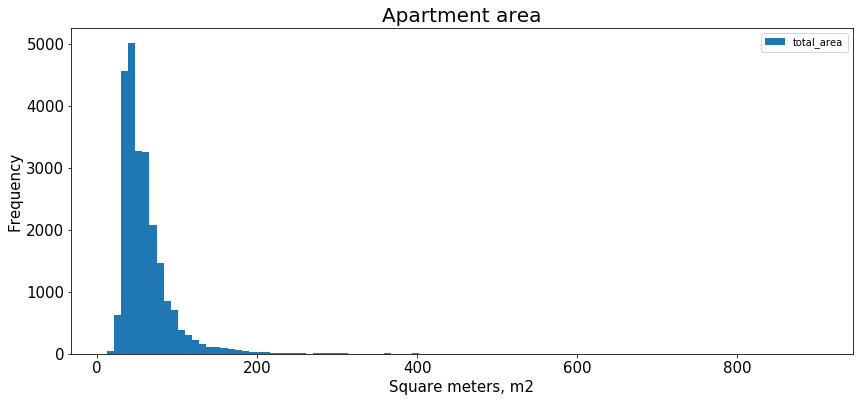

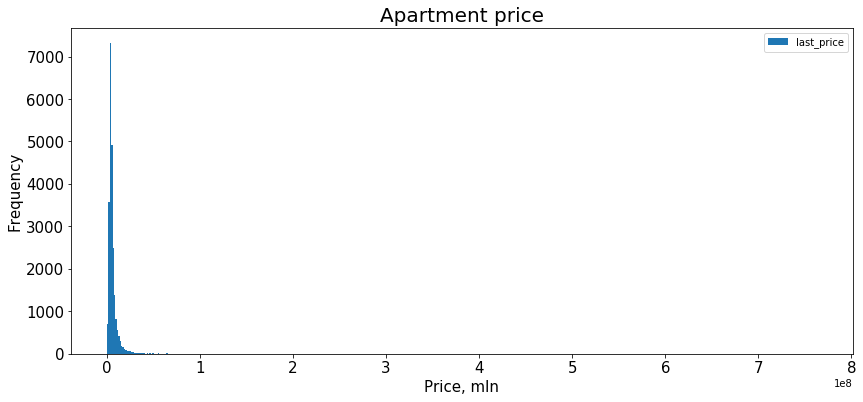

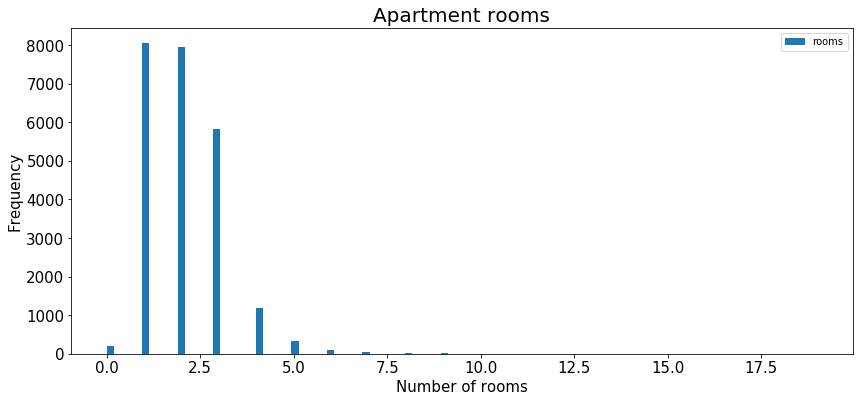

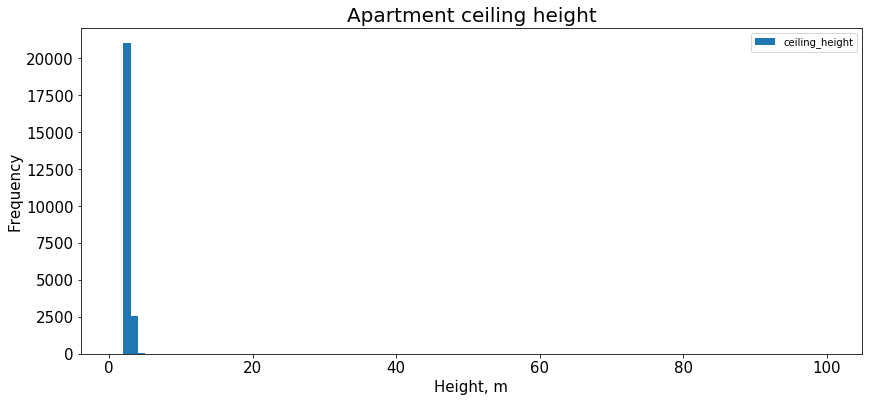

In [22]:
# строим гистограммы для каждой колонки
optimized_data['total_area'].plot(title='Apartment area', fontsize=15, legend=True,\
                        kind='hist', bins=100, figsize=(14, 6)).title.set_size(20)
plt.xlabel('Square meters, m2',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

optimized_data['last_price'].plot(title='Apartment price', fontsize=15, legend=True,\
                        kind='hist', bins=500, figsize=(14, 6)).title.set_size(20)
plt.xlabel('Price, mln',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()
optimized_data
data['rooms'].plot(title='Apartment rooms', fontsize=15, legend=True,\
                   kind='hist', bins=100, figsize=(14, 6)).title.set_size(20)
plt.xlabel('Number of rooms',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

optimized_data['ceiling_height'].plot(title='Apartment ceiling height', fontsize=15, legend=True,\
                            kind='hist', bins=100, figsize=(14, 6)).title.set_size(20)
plt.xlabel('Height, m',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

In [23]:
# Изучим время продажи квартиры.
# Построим гистограмму.
# Посчитаем среднее и медиану.
# Опишем, сколько по времени обычно занимает продажа

# изучим время продаж
optimized_data['posted_days'].sort_values().value_counts()

95.00      3244
45.00       879
60.00       538
7.00        234
30.00       208
           ... 
773.00        1
1117.00       1
1014.00       1
844.00        1
1.00          1
Name: posted_days, Length: 1141, dtype: int64

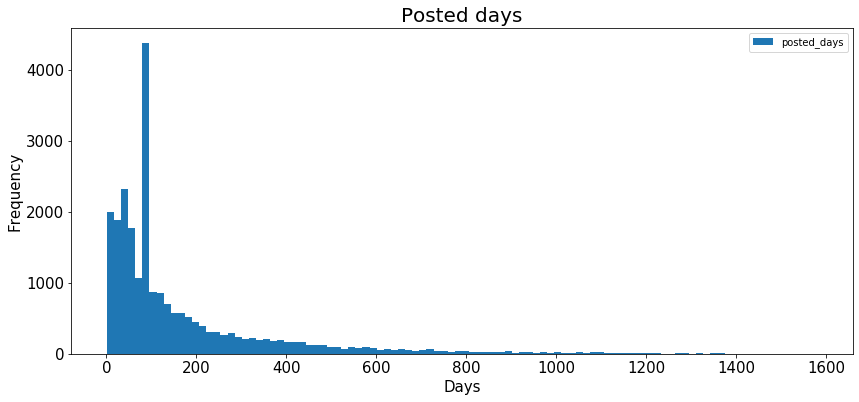

In [24]:
# строим гистограммы
optimized_data['posted_days'].plot(title='Posted days', fontsize=15, legend=True,\
                            kind='hist', bins=100, figsize=(14, 6)).title.set_size(20)
plt.xlabel('Days',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

In [25]:
# считаем среднее и медиану.
# считаем среднее
print('Среднее:', optimized_data['posted_days'].mean())

# считаем optimized_data
print('Медиана:', optimized_data['posted_days'].median())

# посчитаем количество долгих продаж (от 600 дней) и быстрых продаж (меньше месяца)
print('Продажи общие:', optimized_data['posted_days'].count())
print('Продажи больше 600 дней:', optimized_data[optimized_data['posted_days'] >= 600]['posted_days'].count())
print('Продажи меньше месяца:', optimized_data[optimized_data['posted_days'] <= 30]['posted_days'].count())

Среднее: 169.22275
Медиана: 95.0
Продажи общие: 23650
Продажи больше 600 дней: 1201
Продажи меньше месяца: 3733


### Вывод
    - Продажа обычно проходит в течении 95 дней (данный факт подтверждает, и количество закрытых продаж с данным верменем, и гистограммой, и средним значением)
    - среднее значение искажено сверх долгими продажами (логичнее брать медиану)
    - Долгими продажами можно считать продажи от 600 дней, быстрые продажи меньше 30 дней

,posted_days,total_images,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,...,distance_nearest_airport,distance_nearest_parks,parks_around3000,distance_nearest_ponds,ponds_around3000,price_per_meter,day_posted,year_posted,total_area_to_living_area_ratio,total_area_to_kitchen_area_ratio
count,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,...,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00
mean,169.22,9.86,6541126.50,2.07,60.33,34.09,10.43,2.72,10.67,5.89,...,28800.99,490.81,0.47,518.01,0.59,99432.24,15.48,2017.37,0.57,0.19
std,206.55,5.68,10896399.00,1.08,35.66,21.17,5.63,0.99,6.58,4.88,...,11060.32,200.02,0.75,172.20,0.88,50337.93,8.64,1.04,0.12,0.08
min,1.00,0.00,12190.00,0.00,12.00,2.00,1.30,1.00,1.00,1.00,...,0.00,1.00,0.00,13.00,0.00,111.83,1.00,2014.00,0.02,0.02
25%,45.00,6.00,3400000.00,1.00,40.00,19.00,7.30,2.60,5.00,2.00,...,21173.75,490.80,0.00,517.98,0.00,76614.96,8.00,2017.00,0.49,0.13
50%,95.00,9.00,4650000.00,2.00,52.00,30.00,9.10,2.65,9.00,4.00,...,28793.67,490.80,0.00,517.98,0.00,95000.00,15.00,2017.00,0.57,0.17
75%,198.00,14.00,6799000.00,3.00,69.70,41.04,11.43,2.70,16.00,8.00,...,34358.00,490.80,1.00,517.98,1.00,114274.16,23.00,2018.00,0.64,0.23
max,1580.00,50.00,763000000.00,19.00,900.00,409.70,112.00,100.00,60.00,33.00,...,84869.00,3190.00,3.00,1344.00,3.00,1907500.00,31.00,2019.00,2.31,0.79


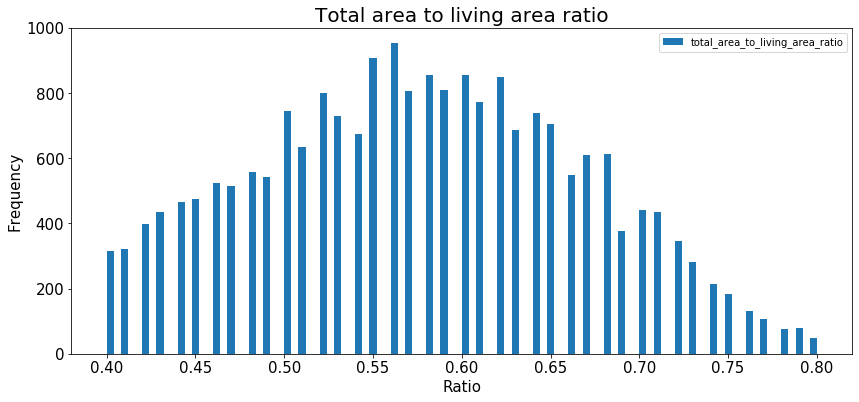

,posted_days,total_images,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,...,distance_nearest_airport,distance_nearest_parks,parks_around3000,distance_nearest_ponds,ponds_around3000,price_per_meter,day_posted,year_posted,total_area_to_living_area_ratio,total_area_to_kitchen_area_ratio
count,13746.00,13746.00,13746.00,13746.00,13746.00,13746.00,13746.00,13746.00,13746.00,13746.00,...,13746.00,13746.00,13746.00,13746.00,13746.00,13746.00,13746.00,13746.00,13746.00,13746.00
mean,154.46,9.86,4667063.50,1.99,53.23,30.90,9.18,2.64,10.60,5.79,...,29164.15,490.65,0.38,526.54,0.48,88971.38,15.51,2017.40,0.57,0.18
std,126.46,5.48,1883931.88,0.86,16.54,11.73,3.00,0.11,6.45,4.83,...,11250.50,171.49,0.67,159.89,0.79,27520.00,8.66,0.97,0.09,0.06
min,31.00,0.00,1000000.00,1.00,30.10,12.00,2.00,2.50,1.00,1.00,...,0.00,1.00,0.00,16.00,0.00,10507.25,1.00,2014.00,0.40,0.04
25%,67.00,6.00,3350000.00,1.00,40.60,20.00,7.00,2.56,5.00,2.00,...,20982.75,490.80,0.00,517.98,0.00,72020.36,8.00,2017.00,0.50,0.13
50%,95.00,10.00,4400000.00,2.00,50.20,30.00,9.00,2.65,9.00,4.00,...,28793.67,490.80,0.00,517.98,0.00,90000.00,15.00,2017.00,0.57,0.17
75%,197.00,14.00,5750000.00,3.00,62.90,38.90,10.50,2.65,15.00,8.00,...,35068.00,490.80,1.00,517.98,1.00,105855.15,23.00,2018.00,0.64,0.22
max,599.00,39.00,10000000.00,5.00,183.00,112.00,43.20,3.00,60.00,32.00,...,84853.00,3190.00,3.00,1344.00,3.00,262711.84,31.00,2019.00,0.80,0.79


,total_area,total_area_to_living_area_ratio,total_area_to_kitchen_area_ratio
count,13746.00,13746.00,13746.00
mean,53.23,0.57,0.18
std,16.54,0.09,0.06
min,30.10,0.40,0.04
25%,40.60,0.50,0.13
50%,50.20,0.57,0.17
75%,62.90,0.64,0.22
max,183.00,0.80,0.79


In [26]:
display(optimized_data.describe())

# строим гистограмму для rooms
optimized_data['total_area_to_living_area_ratio'].plot(title='Total area to living area ratio', fontsize=15, legend=True,\
                            kind='hist', bins=100, range=(0.4, 0.8), figsize=(14, 6)).title.set_size(20)
plt.xlabel('Ratio',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

# Уберем редкие и выбивающиеся значения.
good_data = optimized_data.query('\
                       posted_days > 30 and posted_days < 600 and \
                       total_area > 30 and total_area < 200 and \
                       rooms > 0 and rooms < 6 and \
                       ceiling_height >= 2.5 and ceiling_height <= 3 and \
                       last_price >= 1000000 and last_price <= 10000000 and \
                       total_area_to_living_area_ratio >= 0.4 and total_area_to_living_area_ratio <= 0.8 \
                       ')

# проверяем влияние изменений
display(good_data.describe())
display(good_data[['total_area', 'total_area_to_living_area_ratio', 'total_area_to_kitchen_area_ratio']].describe())

In [27]:
# избавляемся от значений ratio living и kitchen, где их сумма превышала 1 (1 = общая площадь квартиры)
# были убраны значения, где доля жилой площади меньше, чем площадь кухни (количество таких квартир небольшое,
# можно принести в жертву)

good_data =good_data.query('(total_area_to_living_area_ratio + total_area_to_kitchen_area_ratio)\
    <= 1 and total_area_to_living_area_ratio > total_area_to_kitchen_area_ratio')

In [28]:
# проверяем влияние изменений
display(good_data.describe())

,posted_days,total_images,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,...,distance_nearest_airport,distance_nearest_parks,parks_around3000,distance_nearest_ponds,ponds_around3000,price_per_meter,day_posted,year_posted,total_area_to_living_area_ratio,total_area_to_kitchen_area_ratio
count,13666.00,13666.00,13666.00,13666.00,13666.00,13666.00,13666.00,13666.00,13666.00,13666.00,...,13666.00,13666.00,13666.00,13666.00,13666.00,13666.00,13666.00,13666.00,13666.00,13666.00
mean,154.62,9.87,4669440.00,1.99,53.29,30.92,9.15,2.64,10.58,5.78,...,29157.48,490.58,0.38,526.47,0.48,88911.51,15.51,2017.40,0.57,0.18
std,126.49,5.48,1884509.50,0.85,16.55,11.75,2.92,0.11,6.44,4.81,...,11243.86,171.16,0.67,159.84,0.79,27509.75,8.66,0.97,0.09,0.06
min,31.00,0.00,1000000.00,1.00,30.10,12.00,2.00,2.50,1.00,1.00,...,0.00,1.00,0.00,16.00,0.00,10507.25,1.00,2014.00,0.40,0.04
25%,67.00,6.00,3350000.00,1.00,40.80,20.00,7.00,2.56,5.00,2.00,...,20996.50,490.80,0.00,517.98,0.00,72000.00,8.00,2017.00,0.50,0.13
50%,95.00,10.00,4400000.00,2.00,50.40,30.00,9.00,2.65,9.00,4.00,...,28793.67,490.80,0.00,517.98,0.00,89860.48,15.00,2017.00,0.57,0.17
75%,198.00,14.00,5769000.00,3.00,63.00,39.00,10.50,2.65,15.00,8.00,...,35039.00,490.80,1.00,517.98,1.00,105797.10,23.00,2018.00,0.64,0.22
max,599.00,39.00,10000000.00,5.00,183.00,112.00,35.90,3.00,60.00,32.00,...,84853.00,3190.00,3.00,1344.00,3.00,262711.84,31.00,2019.00,0.80,0.44


In [29]:
# сравним количество дней, которое было размещено  объявление и год
# (возможно количество дней превышает разницу между конечной датой и датой появления поста)
correct_posted_days = good_data.query('posted_days >= 500 and year_posted >= 2017').sort_values('posted_days')
correct_posted_days['difference'] = correct_posted_days['first_posted_days'].max() - correct_posted_days['first_posted_days']

correct_posted_days['difference'] = correct_posted_days['difference'].astype(str).str.split().str[0].astype(int)

correct_posted_days['difference_bool'] = correct_posted_days['difference'].equals(correct_posted_days['posted_days'])
    
print(correct_posted_days.groupby(by='difference_bool')['difference', 'posted_days'].count())

# теория не подтвердилась, колонка posted_days корректна

                 difference  posted_days
difference_bool                         
False                   127          127


### Вывод
    - Встретились сверх большие значения и значения около 0, либо 0 в колонках, где не должно быть 0. Данные скорректированы.
    - Наиболее интересными были колонки total_area_to_living_area_ratio и total_area_to_kitchen_area_ratio так, как сумарко их доли превышали общую площадь квартиры.

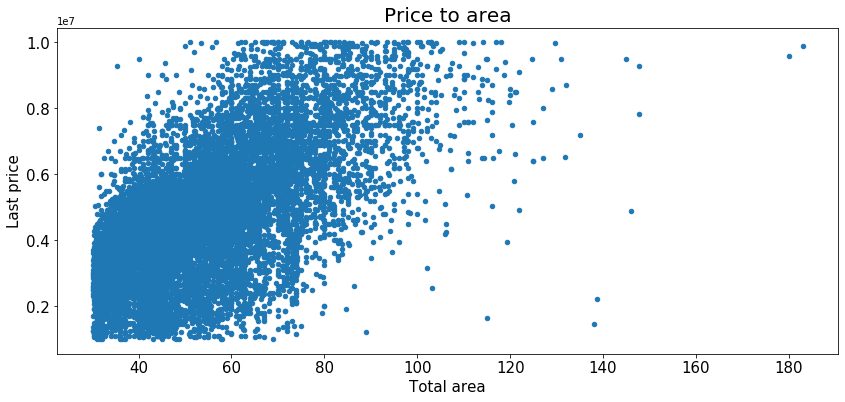

0.64


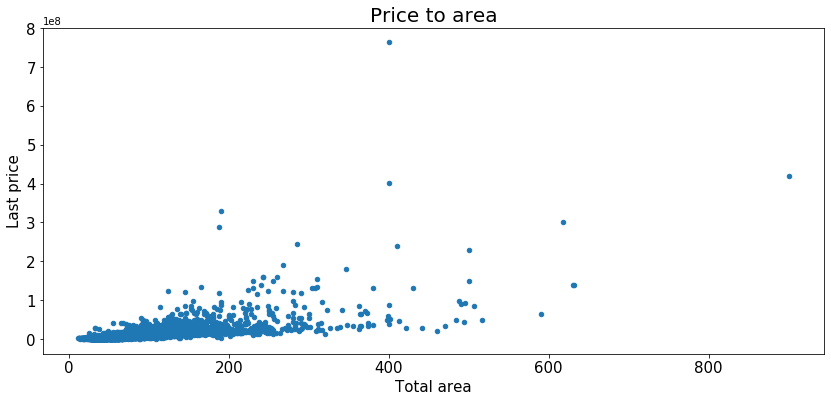

0.65


In [30]:
# Зависит ли цена от квадратного метра
# Зависит ли цена от числа комнат
# Зависит ли цена от этажа (первого или последнего)
# Зависит ли цена от удалённости от центра

good_data.plot(title='Price to area', x='total_area', y='last_price', fontsize=15, legend=True,\
                            kind='scatter', figsize=(14, 6)).title.set_size(20)
plt.xlabel('Total area',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

print(good_data['total_area'].corr(good_data['last_price']).round(2))

optimized_data.plot(title='Price to area', x='total_area', y='last_price', fontsize=15, legend=True,\
                            kind='scatter', figsize=(14, 6)).title.set_size(20)
plt.xlabel('Total area',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

print(optimized_data['total_area'].corr(optimized_data['last_price']).round(2))

    Исходя из полученного графика видно, что стоимость квартиры может составлять 10 млн., как площадью 180 кв.м., так и 60 кв.м., это обусловлено 3 фактором (к примеру удаленность от центра города).

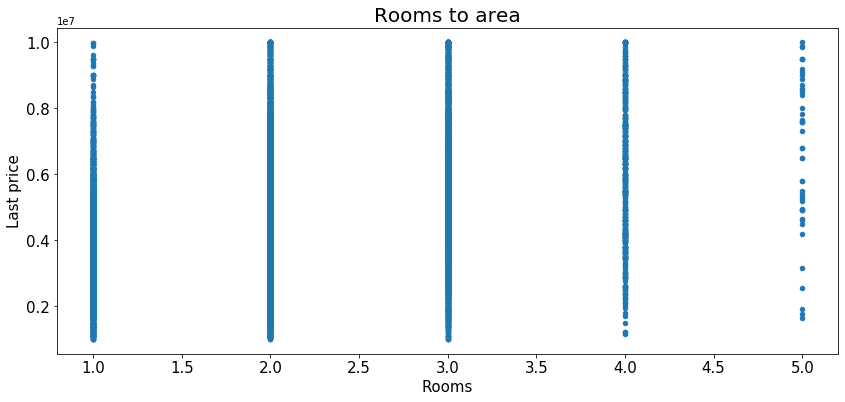

0.39


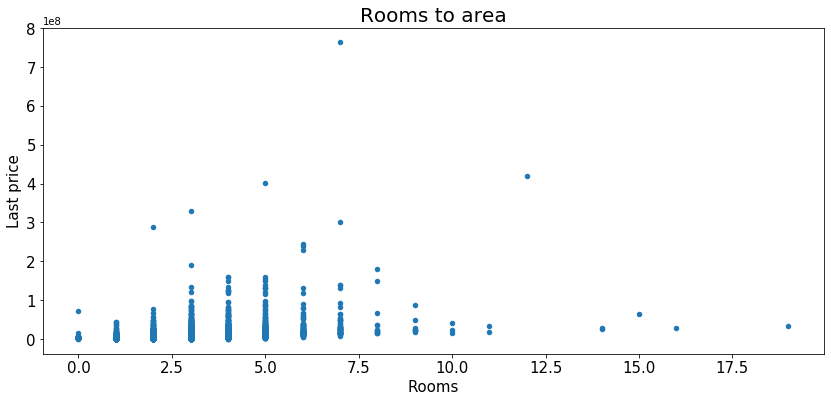

0.36


In [31]:
good_data.plot(title='Rooms to area', x='rooms', y='last_price', fontsize=15, legend=True,\
                            kind='scatter', figsize=(14, 6)).title.set_size(20)
plt.xlabel('Rooms',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

print(good_data['rooms'].corr(good_data['last_price']).round(2))

optimized_data.plot(title='Rooms to area', x='rooms', y='last_price', fontsize=15, legend=True,\
                            kind='scatter', figsize=(14, 6)).title.set_size(20)
plt.xlabel('Rooms',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

print(optimized_data['rooms'].corr(optimized_data['last_price']).round(2))

    Исходя из полученного графика видно, что зависимость слабая, это подтверждает параметр корреляции. Стоимость 1 или 5 комнат обусловлено 3 фактором (к примеру удаленность от центра города).

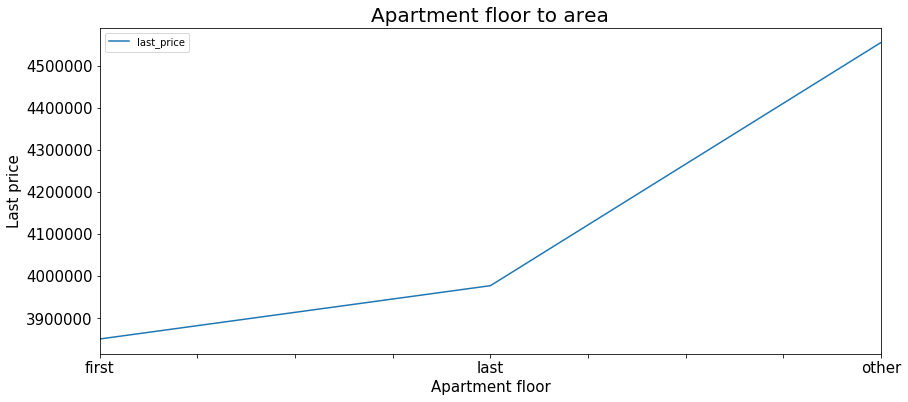

                 last_price
apartment_floor            
first            3850000.00
last             3976732.00
other            4555000.00


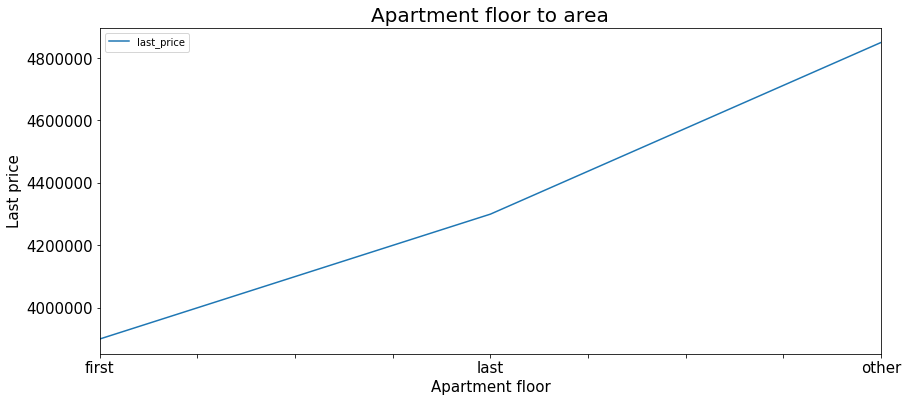

                 last_price
apartment_floor            
first            3900000.00
last             4300000.00
other            4850000.00


In [32]:
# группируем по цена и этажу
# строим график
group_floor_price = good_data.pivot_table(index='apartment_floor', values='last_price', aggfunc='median')
group_floor_price.plot(title='Apartment floor to area', fontsize=15, legend=True,\
                       figsize=(14, 6)).title.set_size(20)
plt.xlabel('Apartment floor',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()
print(group_floor_price)

group_floor_price = optimized_data.pivot_table(index='apartment_floor', values='last_price', aggfunc='median')
group_floor_price.plot(title='Apartment floor to area', fontsize=15, legend=True,\
                       figsize=(14, 6)).title.set_size(20)
plt.xlabel('Apartment floor',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()
print(group_floor_price)

    Можно утверждать, что первый этаж самый не популярный и его стоимость самая низкая, следом идет последный этаж. Это логично так, как с данными этажами связан ряд неудобств: на первом этаже все видно и слышно, не работающий лифт принесет много неудобств живущим на последнем этаже и т.д.

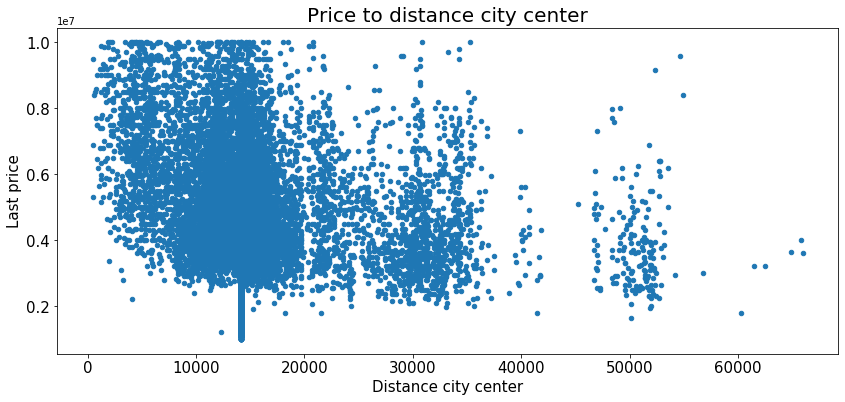

-0.19


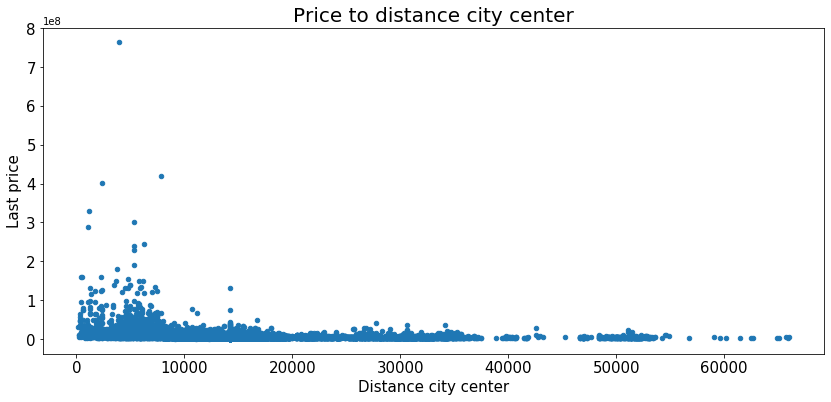

-0.2


In [33]:
good_data.plot(title='Price to distance city center', x='distance_city_center', y='last_price', fontsize=15, legend=True,\
                            kind='scatter', figsize=(14, 6)).title.set_size(20)
plt.xlabel('Distance city center',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

print(good_data['distance_city_center'].corr(good_data['last_price']).round(2))

optimized_data.plot(title='Price to distance city center', x='distance_city_center', y='last_price', fontsize=15, legend=True,\
                            kind='scatter', figsize=(14, 6)).title.set_size(20)
plt.xlabel('Distance city center',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

print(optimized_data['distance_city_center'].corr(optimized_data['last_price']).round(2))

Исходя из полученного графика видно, что зависимость слабая и отрицательная, это подтверждает параметр корреляции. Стоимость слабо падает от удаленности от центра города, обусловлено это 3 фактором (к примеру количество комнат, площадь квартиры и т.д).

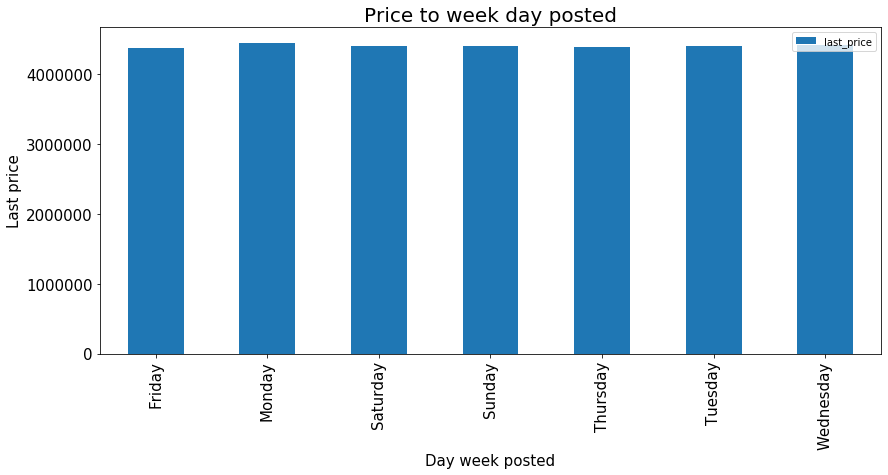

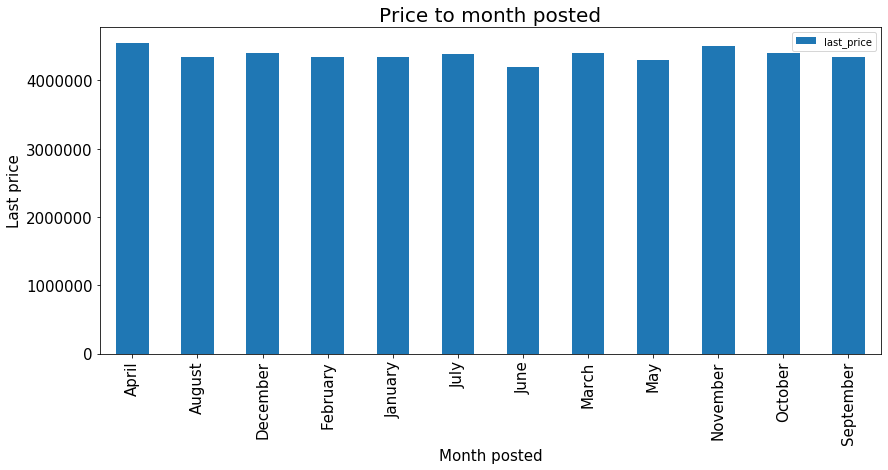

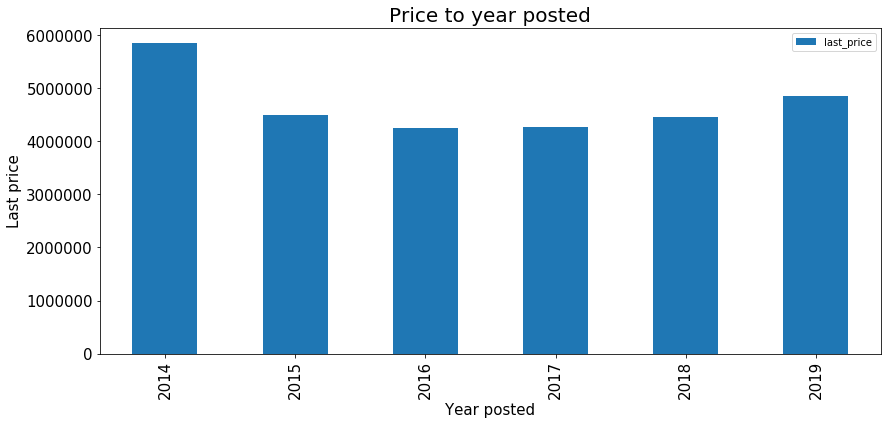

year_posted
2014   5747750.00
2015   4752787.50
2016   4613215.00
2017   4593778.00
2018   4654611.00
2019   4974951.50
Name: last_price, dtype: float32

year_posted
2014      20
2015     452
2016    1674
2017    5028
2018    4895
2019    1597
Name: last_price, dtype: int64

In [34]:
# Зависимость стоимости от даты размещения: дня недели, месяца и года.
group_day_price = good_data.pivot_table(index='day_week_posted', values='last_price', aggfunc='median')
group_day_price.plot(title='Price to week day posted', fontsize=15, legend=True, kind='bar',\
                     figsize=(14, 6)).title.set_size(20)
plt.xlabel('Day week posted',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

group_month_price = good_data.pivot_table(index='month_posted', values='last_price', aggfunc='median')
group_month_price.plot(title='Price to month posted', fontsize=15, legend=True, kind='bar',\
                     figsize=(14, 6)).title.set_size(20)
plt.xlabel('Month posted',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

group_year_price = good_data.pivot_table(index='year_posted', values='last_price', aggfunc='median')
group_year_price.plot(title='Price to year posted', fontsize=15, legend=True, kind='bar',\
                     figsize=(14, 6)).title.set_size(20)
plt.xlabel('Year posted',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

display(good_data.groupby('year_posted')['last_price'].mean())
display(good_data.groupby('year_posted')['last_price'].count())

    В случае стоимости жилья к дню недели и месяцу, зависимость минимальна, к году зависимость есть. Количество объявлений выросло в десятки раз, средняя стоимость квартир упала.

In [35]:
# 10 населённых пунктов с наибольшим числом объявлений
top_city = good_data['locality_name'].value_counts().head(10)
print(top_city)

# фильтруем good_data по top_city
top_city_data = good_data.query('locality_name in @top_city.index')

# счтаем среднюю стоимость за кв.м.
top_city_data_mean = (
    top_city_data.pivot_table(index='locality_name', values='price_per_meter')
    .round(2)
    .sort_values(by='price_per_meter', ascending=False)
)

print('\n', top_city_data_mean)

# населеные пункты с max стоимость жилья
print('\n{} с самой высокой стоимостью жилья {}'.format(top_city_data_mean.index[0].capitalize(),\
                                                        top_city_data_mean['price_per_meter'].max()))

# населеные пункты с min стоимость жилья
print('\n{} с самой низкой стоимостью жилья {}'.format(top_city_data_mean.index[-1].capitalize(),\
                                                       top_city_data_mean['price_per_meter'].min()))

санкт-петербург      8356
поселок мурино        305
поселок шушары        295
всеволожск            290
колпино               234
гатчина               227
пушкин                226
поселок парголово     191
деревня кудрово       171
выборг                156
Name: locality_name, dtype: int64

                    price_per_meter
locality_name                     
санкт-петербург          102626.50
пушкин                    98735.48
деревня кудрово           92104.34
поселок парголово         88933.35
поселок мурино            83414.94
поселок шушары            76947.86
колпино                   74278.86
гатчина                   68062.58
всеволожск                66489.50
выборг                    57530.34

Санкт-петербург с самой высокой стоимостью жилья 102626.5

Выборг с самой низкой стоимостью жилья 57530.33984375


    Были отобраны топ 10 населенных пунктов с наибольшим количеством объявлений. В Топ 1, с огромным отрывом попал город Санкт-Петербург. Санкт-Петербург так же лидирует по стоимости жилья, наименьшая стоимость жилья в городе Выборг.

In [36]:
# приводим дистанцию до центра к километрам
good_data['distance_city_center_km'] = good_data['distance_city_center'] / 1000

# меняем тип числа на int
good_data['distance_city_center_km'] = good_data['distance_city_center_km'].astype(int)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13666 entries, 1 to 23696
Data columns (total 33 columns):
first_posted_days                   13666 non-null datetime64[ns]
posted_days                         13666 non-null float32
total_images                        13666 non-null uint8
last_price                          13666 non-null float32
rooms                               13666 non-null uint8
total_area                          13666 non-null float32
living_area                         13666 non-null float32
kitchen_area                        13666 non-null float32
ceiling_height                      13666 non-null float32
floors_total                        13666 non-null float32
floor                               13666 non-null uint8
balcony                             13666 non-null float32
locality_name                       13666 non-null object
distance_city_center                13666 non-null float32
distance_nearest_airport            13666 non-null float32
distan

                         last_price
distance_city_center_km            
0                        7629083.50
1                        7547089.00
2                        7207414.00
3                        6685427.50
4                        7046314.50
5                        6817629.00
6                        6347386.50
7                        6313086.50
8                        5838861.50
9                        5270772.50
10                       5175678.00
11                       5329883.00
12                       5268717.00
13                       5517086.50
14                       5285477.00
15                       5132578.50
16                       4985969.50
17                       4633093.50
18                       5030324.50
19                       4724399.50
20                       6363922.00
21                       5227602.50
22                       5301895.00
23                       4381764.50
24                       4148000.00
25                       460

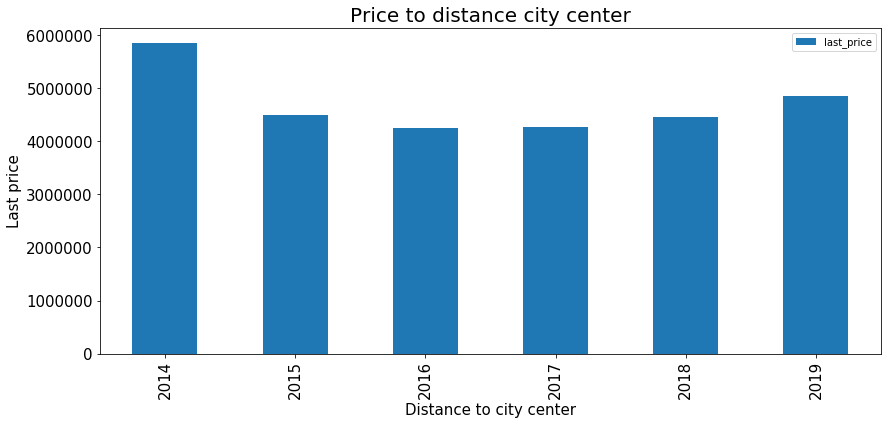

In [37]:
# группируем good_data по городу
peter_data = good_data[good_data['locality_name'] == 'санкт-петербург']

# делаем сводную таблицу по стоимости каждого километра
distance_price = peter_data.pivot_table(index='distance_city_center_km', values='last_price')
print(distance_price)

# строим график
group_year_price.plot(title='Price to distance city center', fontsize=15, legend=True, kind='bar',\
                     figsize=(14, 6)).title.set_size(20)
plt.xlabel('Distance to city center',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

    Первый провал графика идет на 3 км. соответственно это и есть область входящая в центр.

In [38]:
# формируем таблицу с данными только центра Петербурга
peter_center_data = peter_data[peter_data['distance_city_center_km'] <= 3]
print(peter_data['locality_name'].value_counts())
print(peter_center_data['locality_name'].value_counts())

# анализируем данные по колонкам площадь, цена, число комнат, высота потолков

peter_center_data[['total_area', 'last_price', 'floors_total', 'ceiling_height']].describe()

санкт-петербург    8356
Name: locality_name, dtype: int64
санкт-петербург    260
Name: locality_name, dtype: int64


,total_area,last_price,floors_total,ceiling_height
count,260.00,260.00,260.00,260.00
mean,68.17,7008611.50,4.92,2.74
std,20.68,1653993.88,1.35,0.15
min,31.00,2800000.00,2.00,2.50
25%,51.12,5650000.00,4.00,2.65
50%,66.90,7125000.00,5.00,2.65
75%,82.12,8400000.00,6.00,2.85
max,147.80,10000000.00,14.00,3.00


    В центре Петербурга средние показатели следующие:
    - площадь квартиры = около 70 кв.м.
    - стоимость квартиры = 7 млн. р.
    - количество этажей = 5
    - высота потолков = 2.75 м.

       last_price
rooms            
1      5440762.00
2      6538044.50
3      7650780.50
4      8624214.00
5      9037500.00


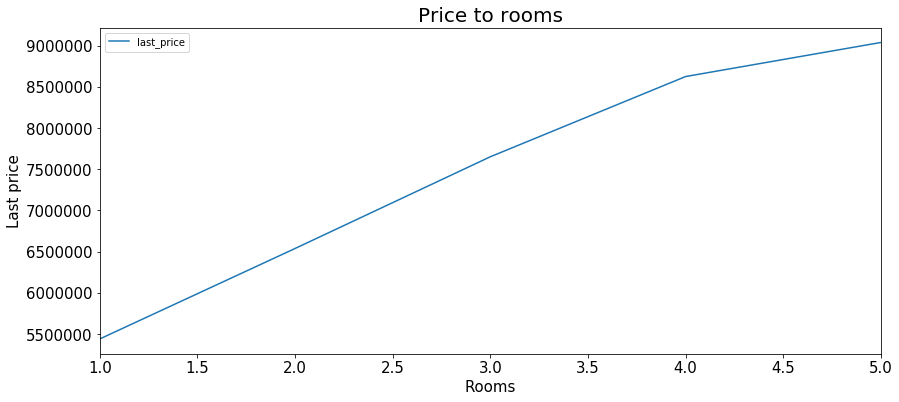

                 last_price
apartment_floor            
first            6364798.50
other            7196316.50
last             7214147.50


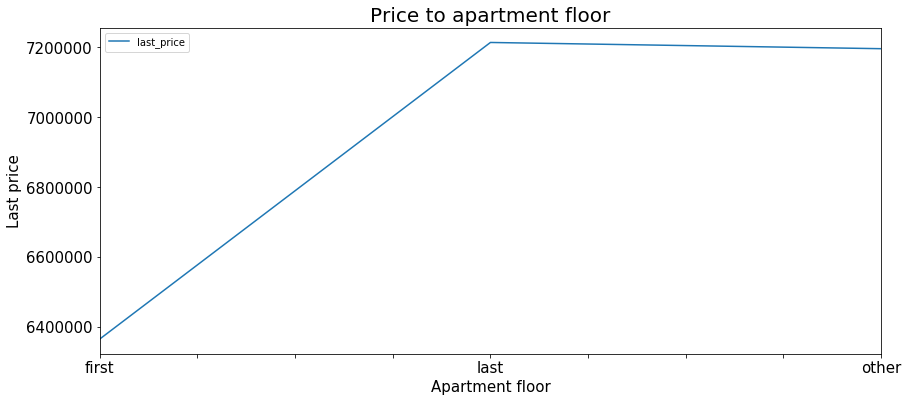

                         last_price
distance_city_center_km            
3                        6685427.50
2                        7207414.00
1                        7547089.00
0                        7629083.50


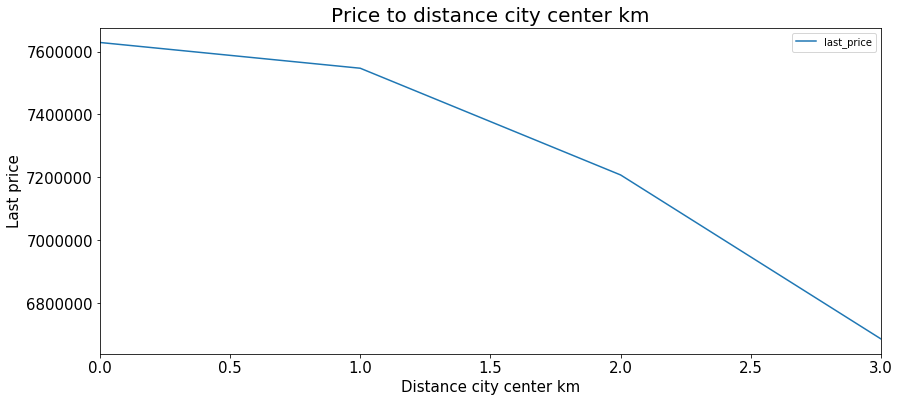

                 last_price
day_week_posted            
Thursday         6624354.00
Saturday         6855884.50
Friday           6997250.00
Monday           7044143.00
Tuesday          7115457.00
Wednesday        7164381.00
Sunday           7654059.00


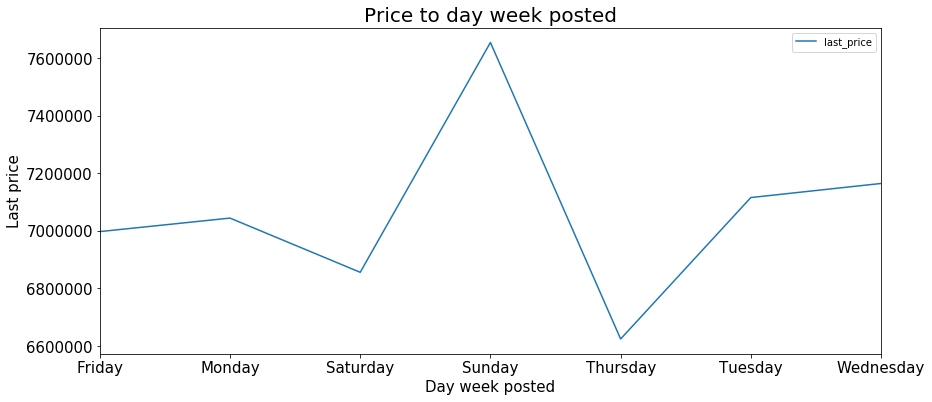

              last_price
month_posted            
June          6329278.00
August        6597714.50
May           6778666.50
October       6849956.50
February      6923333.50
November      7004487.00
September     7030947.50
January       7055866.50
December      7089117.50
July          7309722.00
April         7350357.00
March         7607894.50


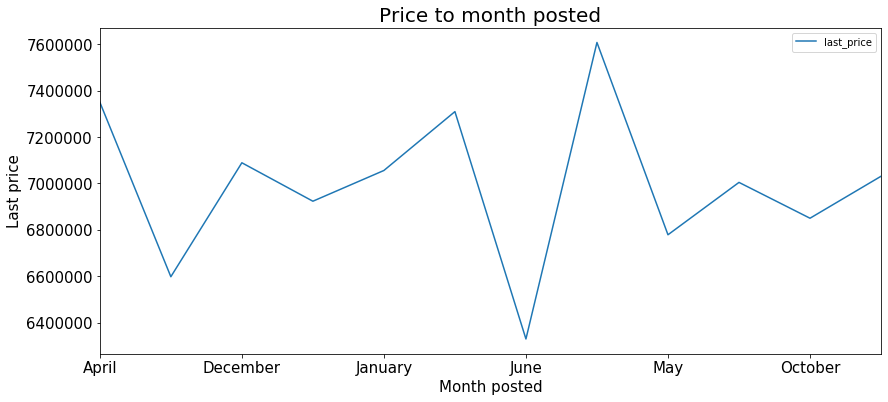

             last_price
year_posted            
2017         6710489.50
2015         6848950.00
2018         7008648.50
2016         7304333.50
2019         7948182.00
2014         9000000.00


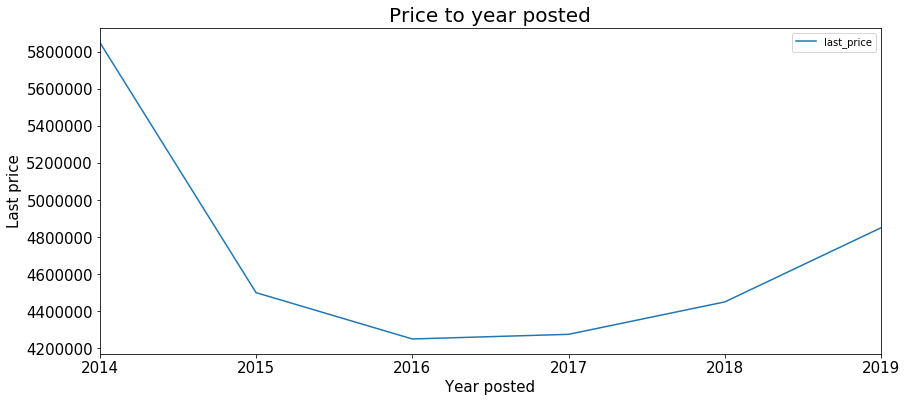

In [39]:
# факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)
peter_center_data_matrix = peter_center_data[['rooms', 'apartment_floor', 'distance_city_center_km',\
                                              'day_week_posted', 'month_posted', 'year_posted', 'last_price']]

# Стоимость к количеству комнат
peter_room_price = peter_center_data_matrix.pivot_table(index='rooms', values='last_price')
print(peter_room_price.sort_values('last_price'))
peter_room_price.plot(title='Price to rooms', fontsize=15, legend=True,\
                     figsize=(14, 6)).title.set_size(20)
plt.xlabel('Rooms',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

# Стоимость к этожу
peter_apartment_floor_price = peter_center_data_matrix.pivot_table(index='apartment_floor',\
                                                                   values='last_price')
print(peter_apartment_floor_price.sort_values('last_price'))
peter_apartment_floor_price.plot(title='Price to apartment floor', fontsize=15, legend=True,\
                     figsize=(14, 6)).title.set_size(20)
plt.xlabel('Apartment floor',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

# Стоимость к удаленности от центра
peter_distance_city_center_km_price = peter_center_data_matrix.pivot_table(index='distance_city_center_km',\
                                                                           values='last_price')
print(peter_distance_city_center_km_price.sort_values('last_price'))
peter_distance_city_center_km_price.plot(title='Price to distance city center km', fontsize=15, legend=True,\
                     figsize=(14, 6)).title.set_size(20)
plt.xlabel('Distance city center km',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

# Стоимость к дню недели
peter_day_week_posted_price = peter_center_data_matrix.pivot_table(index='day_week_posted',\
                                                                   values='last_price').sort_values('day_week_posted')
print(peter_day_week_posted_price.sort_values('last_price'))
peter_day_week_posted_price.plot(title='Price to day week posted', fontsize=15, legend=True,\
                     figsize=(14, 6)).title.set_size(20)
plt.xlabel('Day week posted',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

# Стоимость к месяцу
peter_month_posted_price = peter_center_data_matrix.pivot_table(index='month_posted',\
                                                                values='last_price')
print(peter_month_posted_price.sort_values('last_price'))
peter_month_posted_price.plot(title='Price to month posted', fontsize=15, legend=True,\
                     figsize=(14, 6)).title.set_size(20)
plt.xlabel('Month posted',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

# Стоимость к году
peter_year_posted_price = peter_center_data_matrix.pivot_table(index='year_posted',\
                                                               values='last_price')
print(peter_year_posted_price.sort_values('last_price'))
group_year_price.plot(title='Price to year posted', fontsize=15, legend=True,\
                     figsize=(14, 6)).title.set_size(20)
plt.xlabel('Year posted',fontsize=15)
plt.ylabel('Last price',fontsize=15)
plt.show()

    - от количества комнат стоимость увеличивается
    - первый этаж попрежнему не популярен, а последний этаж на ряду с другими продается
    - стоимость падает от удаленности от центра
    - Самые большие покупки проходят в воскресенье, а самые маленькие в четверг
    - В июне осуществляются сделки с наименьшей стоимостью, а в марте с наибольшей
    - Самые большие покупки были в 2014 г., потом падение и рост с 2017

### Вывод
    В общих данных очевидные зависимости были не очевидны так, как было сказано ранне, отсутствовал 3 фактор, после введения его (конкретные город, конкретная часть города), все встало на свои места, все зависимости сталь работать, как и ождалось.
    Единственная зависимость, которая практически не изменилась - это стоимость к году.

### <a name="Results"></a> Шаг 5. Общий вывод

    1. Изучены предобработаны предоставленые данные
    2. Посчитаны и добавлены в таблицу следующие параметры:
    - цена квадратного метра;
    - день недели, месяц и год публикации объявления;
    - этаж квартиры; варианты — первый, последний, другой;
    - соотношение жилой и общей площади, а также отношение площади кухни к общей.

    3. Проведен исследовательский анализ данных
    - Изучены следующие параметры: площадь, цена, число комнат, высота потолков. Построены гистограммы для каждого параметра
    - Изучены время продажи квартиры. Построена гистограмма. Посчитаны среднее и медиана
    - Убраны редкие и выбивающиеся значения
    - Выбраны 10 населённых пунктов с наибольшим числом объявлений. Посчитана средняя цена квадратного метра в этих населённых пунктах. Выделены среди них населённые пункты с самой высокой и низкой стоимостью жилья.
    - Изучены предложения квартир. Выделены квартиры в Санкт-Петербурге. Создан столбец с расстоянием до центра в километрах. Посчитана средняя цена для каждого километра. Построин график показывающий, как цена зависит от удалённости от центра. Определена граница.
    - Выделен сегмент квартир в центре. Проанализирована эта территория и изучены следующие параметры: площадь, цена, число комнат, высота потолков. Также выделены факторы, которые влияют на стоимость квартиры

#### <a name="Answers"></a> Ответы на поставленные задачи
    - Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
    Когда значения выбиваются из общей массы (сверх большие или сверхмалые значения, к примеру 5 лет, одна неделя)
    
    - Какие факторы больше всего влияют на стоимость квартиры?
    Основные факторы влияющие на стоимость квартиры это число комнат, этаж, удалённости от центра.
    
    - Зависит ли цена от площади, числа комнат, удалённости от центра? 
    Зависят напрямую
    
    - Есть ли зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
    Зависит, стоимость квартир на первом этаже меньше, чем на остальных
    
    - Есть ли зависимость от даты размещения: дня недели, месяца и года
    В буднии дни стоимость ниже, чем в выходной
    Весной стоимость квартир выше, чем летом
    Зависимость стоимости от года обусловлена 3 фактором
    
    - Выяснить, какая область входит в центр
    В центральную область Петербурга входит расстояние до 3 км.

#### Рекомендации
    - Настроить проверку в слудующих колонках: ceiling_height, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, ponds_nearest, days_exposition. Без заполнения данных колонок объявление не должно выставлятся
    - Тип данных в колонках: floors_total (int), is_apartment (bool), balcony (int), parks_around3000 (int), days_exposition должны правильно обрабатываться. Если предусмотрено целое число, то и тип данных должен быть int
    - Площадь жилая, площадь кухни и т.д. в сумме не должны превышать общую площадь квартиры. Необходимо настроить проверку.